In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt #for making figures
%matplotlib inline

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
words = open("names.txt", "r").read().splitlines()

#String to integer and integer to string mappings have been created
chars = sorted(list(set( "".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [11]:
def build_dataset(words):
    block_size = 4 #Number of characters used to predict the next one 
    X, Y = [], [] #X are the inputs, Y are the labels
    for w in words:
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words) #We shuffle the words
n1 = int(0.8 * len(words)) #We calculate where 80% and 90% is
n2 = int (0.9 * len (words))

Xtr, Ytr = build_dataset(words[:n1]) #Trainingset is from 0-80%
Xdev, Ydev = build_dataset(words[n1:n2]) #Devset is from 80-90%
Xte, Yte = build_dataset(words[n2:]) #Test set is from 90-100%



#Init the embedings C, the params W1, b1, W2, p2
C = torch.randn((27, 12)) 
W1 = torch.randn((48,400))
b1 = torch.randn(400) #Every neuron also gets a random bias 
W2 = torch.randn((400, 27))
b2 = torch.randn(27)

C = C.to(device)
W1 = W1.to(device)
b1 = b1.to(device)
W2 = W2.to(device)
b2 = b2.to(device)

  # Move your inputs and targets to the GPU
Xtr = Xtr.to(device)
Ytr = Ytr.to(device)

parameters = [C, W1, b1, W2, b2]
for p in parameters: 
    p.requires_grad = True

torch.Size([182580, 4]) torch.Size([182580])
torch.Size([22767, 4]) torch.Size([22767])
torch.Size([22799, 4]) torch.Size([22799])


In [12]:
stepI = []
lossI = []

In [13]:
#Training Loop but this time only on traingset
for i in range (500000):
    ix = torch.randint(0, Xtr.shape[0], (512,)) #Generates random 32 integers in a tuple from 0 to the length of X (number of examples)

  

    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 48) @ W1 + b1) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    if(i < 200000):
        lr = 0.1
    elif(i < 400000):
        lr = 0.01
    else:
        lr = 0.001
    for p in parameters:
        p.data += -lr * p.grad

    stepI.append(i)
    lossI.append(loss.log10().item())
#print(loss.item()) #Warning... This loss is calculated for the last minibatch not the entire set. Look belo

: 

In [ ]:
#Training Loop but this time only on traingset
for i in range (500000):
    ix = torch.randint(0, Xtr.shape[0], (512,)) #Generates random 32 integers in a tuple from 0 to the length of X (number of examples)

    #forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 48) @ W1 + b1) 
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, Ytr[ix])
    
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    if(i < 200000):
        lr = 0.1
    elif(i < 400000):
        lr = 0.01
    else:
        lr = 0.001
    for p in parameters:
        p.data += -lr * p.grad

    stepI.append(i)
    lossI.append(loss.log10().item())
#print(loss.item()) #Warning... This loss is calculated for the last minibatch not the entire set. Look below

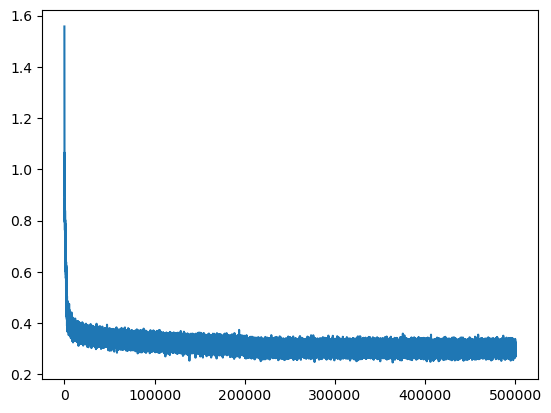

In [ ]:
plt.plot(stepI, lossI)

In [ ]:
#We calculate the loss for the entire set
emb = C[Xdev]
h = torch.tanh(emb.view(-1,48) @ W1 + b1) 
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

emb = C[Xtr]
h = torch.tanh(emb.view(-1,48) @ W1 + b1) 
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.0968008041381836


1.9968699216842651